In [49]:
%matplotlib inline
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()


import sys 
sys.path.append('../../code_general/')
sys.path.append('../../code_Boyle/')

import read_model_ID 
reload(read_model_ID)
import CRISPR_free_energy_landscape as FreeEnergy
reload(FreeEnergy);
import plotting_Boyle as plt_B
reload(plt_B)
import CRISPR_dCas9_binding_curve_Boyle as dCas9
reload(dCas9);


# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc 
rc('axes',edgecolor='black')
rc('xtick',color='black')
rc('ytick',color='black')
rc('text',color='black')
rc('axes',labelcolor='black')

In [50]:
from IPython.display import clear_output


def make_movie(model_id, filename, Nparams, initial_solution, folder='tmp_frames/'):
    
    '''
    Determine total number of frames (excluding the initial frame)
    '''
    X = pd.read_csv(filename, delimiter='\t', index_col=Nparams+2)
    nmbr_frames = len(X)
    del X 
    
    '''
    initial solution will be the first frame: 
    This shows the input to the Simmulated Annealing Algorithm 
    '''
    make_frame(frame='initial',model_id=model_id, filename=filename, Nparams=Nparams, folder='tmp_frames/',
              initial_solution=initial_solution)
    
    '''
    Now fatch all the intermediate solutions from the SA
    '''
    for frame in range(nmbr_frames):
        clear_output()
        print 'making frame ' + str(frame+1) + ' out of ' + str(nmbr_frames)
        make_frame(frame=frame, model_id=model_id, filename=filename, Nparams=Nparams, folder='tmp_frames/')
    return 


def make_frame(frame, model_id, filename, Nparams, folder='tmp_frames/',initial_solution=[]):
    
    
    
    if frame == 'initial':
        parameters = initial_solution
        frame = -1
    else:
        parameters = plt_B.load_simm_anneal(filename, Nparams,fatch_solution=frame)
    Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
    
    
    plt.figure(figsize=(15,15))
    ax1 = plt.subplot2grid((2,3),(0,0),colspan=2)
    ax2= plt.subplot2grid((2,3),(1,0))
    ax3= plt.subplot2grid((2,3), (1,1) )
    ax4= plt.subplot2grid((2,3), (1,2))
    ax5=plt.subplot2grid((2,3), (0,2))
    
    Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id,axis=ax1)
    plt_B.plot_heatmap(Model_on ,cbar=False, kind='OnRate', axis=ax2, fldr_Boyle_data='../../Data_Boyle/KoenDataForMisha/BoyleData/')
    plt_B.plot_heatmap(Model_off ,cbar=False, kind='OffRate',axis=ax3, fldr_Boyle_data='../../Data_Boyle/KoenDataForMisha/BoyleData/')
    plt_B.plot_heatmap(Model_pbound ,cbar=False, kind='Occupancy',axis=ax4, fldr_Boyle_data='../../Data_Boyle/KoenDataForMisha/BoyleData/')
    FreeEnergy.plot_mismatch_penalties(parameters,model_id,axis=ax5)

    ax2.set_aspect(1.0)
    ax3.set_aspect(1.0)
    ax4.set_aspect(1.0)
    # ax5.set_aspect(1.0)
    plt.tight_layout()
    
    plt.savefig(folder + 'frame_' + str(frame+1) +'.png', format='png',dpi=300)
    plt.close()
    
    
    return 

In [52]:
model_id = 'init_limit_general_energies_v0'
filename = '../13_9_2018/fit_13_9_2018_sim_B.txt'
Nparams = 44



init_solution = [5.0] + [0.0]*20 + [5.0]*20 + [5.0] + [50.0] + [3.0]
# make_movie(model_id, filename, Nparams, folder='tmp_frames/',initial_solution=np.array(init_solution))



make_frame(frame='initial',model_id=model_id, filename=filename, Nparams=Nparams, folder='tmp_frames/',
          initial_solution=np.array(init_solution) )





In [ ]:
df = pd.read_csv(filename, delimiter='\t')
df

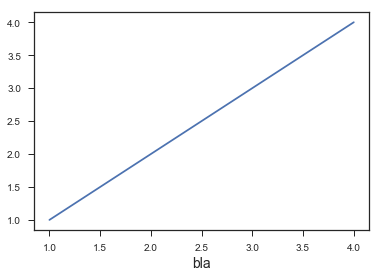

In [55]:
x = [1,2,3,4]
plt.plot(x,x)
ax = plt.gca()
ax.set_xlabel('bla',fontsize=14)